<a href="https://colab.research.google.com/github/qcsm/learndl/blob/master/Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activate Google Drive

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gráfica de ejemplo
Usando NumPy y Matplotlib

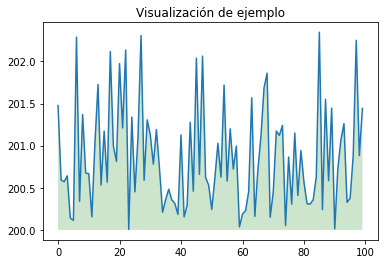

In [17]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + abs(np.random.randn(100))
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 200, where=(ys > 200), facecolor='g', alpha=0.2)

#ys = 200 + abs(np.random.randn(100))
#x = [x for x in range(len(ys))]
#
#plt.plot(x, ys, '-')
#plt.fill_between(x, ys, 200, where=(ys > 200), facecolor='b', alpha=0.2)

plt.title("Visualización de ejemplo")
plt.show()

# TensorFlow version?

In [18]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


# Mount Google Drive

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # TensorFlow simple example



In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [176]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATA/fake_reg.csv')

In [177]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [178]:
df.count()

price       1000
feature1    1000
feature2    1000
dtype: int64

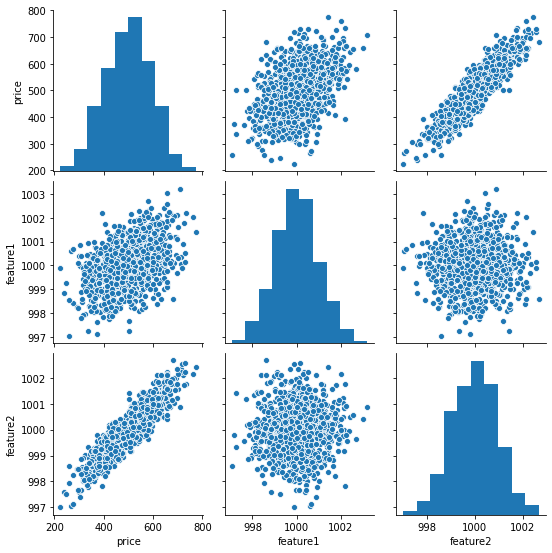

In [179]:
sns.pairplot(df)

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X = df[['feature1','feature2']].values

In [182]:
y = df['price'].values

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [184]:
X_train

array([[1001.23108741,  998.63711842],
       [ 999.38690932,  999.84959104],
       [ 998.23257257, 1001.02270174],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

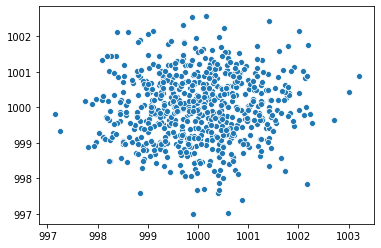

In [185]:
sns.scatterplot(X_train[:,0],X_train[:,1])

# Normalize or scale data
Lets scale the data. This things are done to avoid large values having high impact.

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


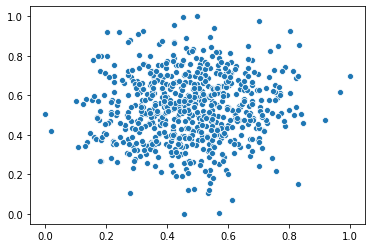

In [188]:
sns.scatterplot(X_train[:,0],X_train[:,1])

# All we need to build a very simple model with Keras
1. A base sequential model
1. Keep adding layers to it (in this case dense layers)


In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [190]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model does

## Two ways to add layers
The second is prefered as you can easily comment out an in layers as required

In [191]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

In [215]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [216]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 256218.8125
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 255934.3281
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 255649.7656
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 255342.4531
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 255007.7812
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 254649.5000
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 254262.7812
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 253853.6094
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 253418.9688
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 252954.6094
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 252453.6406
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

In [217]:
# [print(x) for x in [round(x,1) for x in model.history.history['loss'][:4]]]
# print("...")
# [print(x) for x in [round(x,1) for x in model.history.history['loss'][-4:]]]

def headtail(list, n, decimals=2):
  result = []
  for x in list[:n]:
    result.append(round(x, decimals))
  for x in list[-n:]:
    result.append(round(x, decimals))
  return result

def headtail_print(l):
  for x in range(0,int(len(l)/2)):
    print(l[x])
  print("...")
  for x in range(int(len(l)/2), len(l)):
    print(l[x])


In [218]:
headtail_print( headtail(model.history.history['loss'], 5, 1) )

256218.8
255934.3
255649.8
255342.5
255007.8
...
24.3
24.5
24.3
24.4
24.5


In [219]:
loss_history_df = pd.DataFrame(model.history.history)

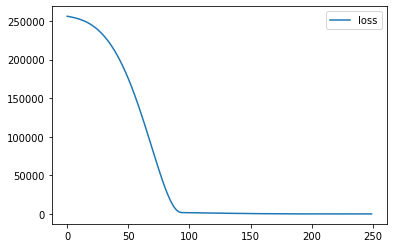

In [220]:
loss_history_df.plot()

# Evaluate the model
To see how it performs with data that has never seen before

In [221]:
model.evaluate(X_test, y_test, verbose=0)

24.29523468017578

In [222]:
model.evaluate(X_train, y_train, verbose=0)

24.038455963134766

In [223]:
test_predictions = model.predict(X_test)

In [224]:
headtail_print( headtail(test_predictions.ravel().tolist(), 5, 1) )

405.5
623.8
592.4
572.4
366.8
...
535.3
433.6
371.0
499.2
497.3


In [225]:
pd.Series( test_predictions.reshape(330,) )


0      405.489227
1      623.783875
2      592.382507
3      572.430542
4      366.751801
          ...    
325    535.255249
326    433.609650
327    370.982269
328    499.200439
329    497.318237
Length: 330, dtype: float32

In [226]:
predictions_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [227]:
predictions_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
325,535.543676
326,425.843651
327,368.920095
328,505.631884


In [228]:
test_preds = pd.Series( test_predictions.reshape(330,) )
compare_predictions_df = pd.concat([predictions_df, test_preds], axis = 1)
compare_predictions_df.columns = ['Test True Y', 'Model Predictions']
compare_predictions_df
# try to remove axis and see what happens

,Test True Y,Model Predictions
0,402.296319,405.489227
1,624.156198,623.783875
2,582.455066,592.382507
3,578.588606,572.430542
4,371.224104,366.751801
...,...,...
325,535.543676,535.255249
326,425.843651,433.609650
327,368.920095,370.982269
328,505.631884,499.200439


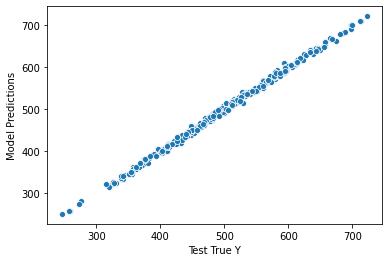

In [229]:
sns.scatterplot( x = 'Test True Y', y = 'Model Predictions', data = compare_predictions_df )

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error( 
    compare_predictions_df['Test True Y'], 
    compare_predictions_df['Model Predictions']
)

3.9476506315825493

## How to know if MAE is good or bad
When thinking on errors, you may feel tempted to thing that a small number is good enough! But actually small is relative. How big are the values that this error applies to?

To know this you can use the `describe()` function that comes with Pandas data frames. The values we are interested in are those below the `price` column, because the Price was our prediction target.

Below you can see that the mean price is around 500, and more interestingly the minimal price is around 220. Moreover, small values like the minimal are not very common. These are good news, it is not the same a $4 error per stack when counting hundreds than the same error when counting dozens.

Anyway, this kind of analysis, is quick, visual, but naïve and prone to be incorrect. It is not a good way to do the things right. So you can use it intuitively to get and share a quick sight without messing around, but never be confident with it.

In [231]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


## Better use MSE or RMSE



In [232]:
mean_squared_error( 
    compare_predictions_df['Test True Y'],
    compare_predictions_df['Model Predictions']
)

24.295237649394622

In [233]:
model.evaluate(X_test, y_test, verbose=0)

24.29523468017578

In [234]:
mean_squared_error( 
    compare_predictions_df['Test True Y'],
    compare_predictions_df['Model Predictions']
) ** 0.5

4.929019948163592

In [235]:
compare_predictions_df['Model Predictions'].describe()

count    330.000000
mean     500.443054
std       93.752647
min      250.988907
25%      436.494148
50%      502.991974
75%      567.346695
max      721.209839
Name: Model Predictions, dtype: float64

RMSE is similar to standard deviation in the error values frequency distribution, while MAE is a more intuitive measure of absolute error. RMSE is greater than MAE and penalizes large errors. MAE are similar while error is evenly distributed across all samples. RMSE is greater otherwise, being this difference max when all the error is accumulated in only one sample.

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

## Predict completely new values

In [236]:
new_gem = [[998,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[419.8368]], dtype=float32)

## Save and load models

In [237]:
from tensorflow.keras.models import load_model

model.save('my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model/assets


In [238]:
another_model = load_model('my_model')

In [239]:
another_model.predict(new_gem)

array([[419.8368]], dtype=float32)